In [1]:
import torch
import copy
import numpy as np
import matplotlib.pyplot as plt
from functions import SquareFunction, GaussianMix
from minimize import DescentOptimizer
from vis import visualize_through_numpy
%matplotlib inline

In [2]:
#Convex
fun = SquareFunction(Q=torch.FloatTensor([[1,0],[0,2]]), c=torch.rand(2));

In [3]:
opt_methods=[
    torch.optim.SGD([fun.x], lr=0.01, momentum=0),
    torch.optim.SGD([fun.x], lr=0.01, momentum=0.9),
    torch.optim.SGD([fun.x], lr=0.01, momentum=0.9,nesterov=True),
    torch.optim.Adam([fun.x], lr=0.01),
    torch.optim.Adagrad([fun.x], lr=0.1),
    torch.optim.Adadelta([fun.x], lr=1,), 
    torch.optim.RMSprop([fun.x], lr=0.01)
    
]

In [4]:
opt_names =[
    "SGD",
    "SGD with momentum",
    "SGD with Nesterov momentum",
    "Adam",
    "Adagrad",
    "Adadelta",
    "RMSProp"
]

In [5]:
#Convex
values = []
for name, opt in zip(opt_names, opt_methods):
    x_steps, y_steps = DescentOptimizer(fun, opt, torch.rand(2), max_iter=10000)
    values.append([x_steps, y_steps, name])

Converged with desired accuracy in 516 iterations.
Converged with desired accuracy in 58 iterations.
Converged with desired accuracy in 59 iterations.
Converged with desired accuracy in 351 iterations.
Converged with desired accuracy in 68 iterations.
Converged with desired accuracy in 370 iterations.
Converged with desired accuracy in 161 iterations.


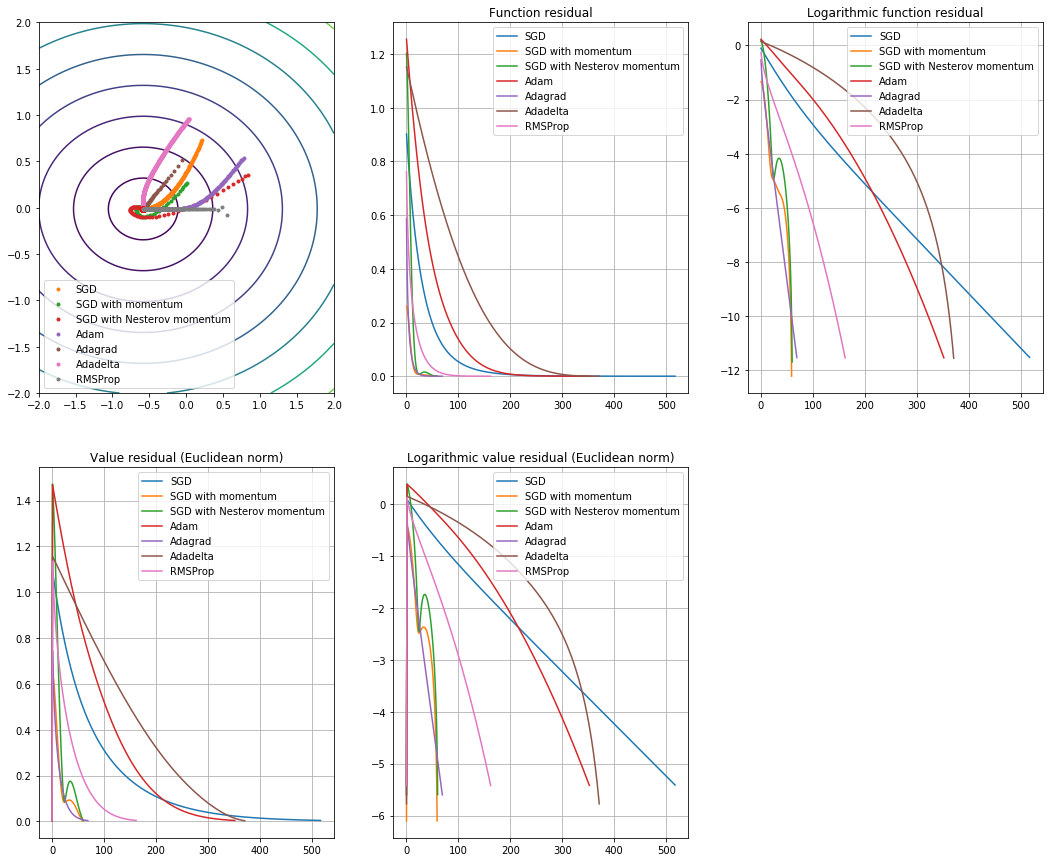

In [6]:
visualize_through_numpy(values, fun, "convex")

In [5]:
#Non-Convex
fun = GaussianMix()
opt_methods=[
    torch.optim.SGD([fun.x], lr=0.01, momentum=0),
    torch.optim.SGD([fun.x], lr=0.01, momentum=0.9),
    torch.optim.SGD([fun.x], lr=0.01, momentum=0.9,nesterov=True),
    torch.optim.Adam([fun.x], lr=0.01),
    torch.optim.Adagrad([fun.x], lr=0.1),
    torch.optim.Adadelta([fun.x], lr=1,), 
    torch.optim.RMSprop([fun.x], lr=0.01)
    
]

In [6]:
#Convex
values = []
init_point = torch.rand(2)
for name, opt in zip(opt_names, opt_methods):
    x_steps, y_steps = DescentOptimizer(fun, opt, torch.rand(2), max_iter=1000)
    values.append([x_steps, y_steps, name])

The desired accuracy was not achieved.
The desired accuracy was not achieved.
The desired accuracy was not achieved.
The desired accuracy was not achieved.
The desired accuracy was not achieved.
The desired accuracy was not achieved.
The desired accuracy was not achieved.


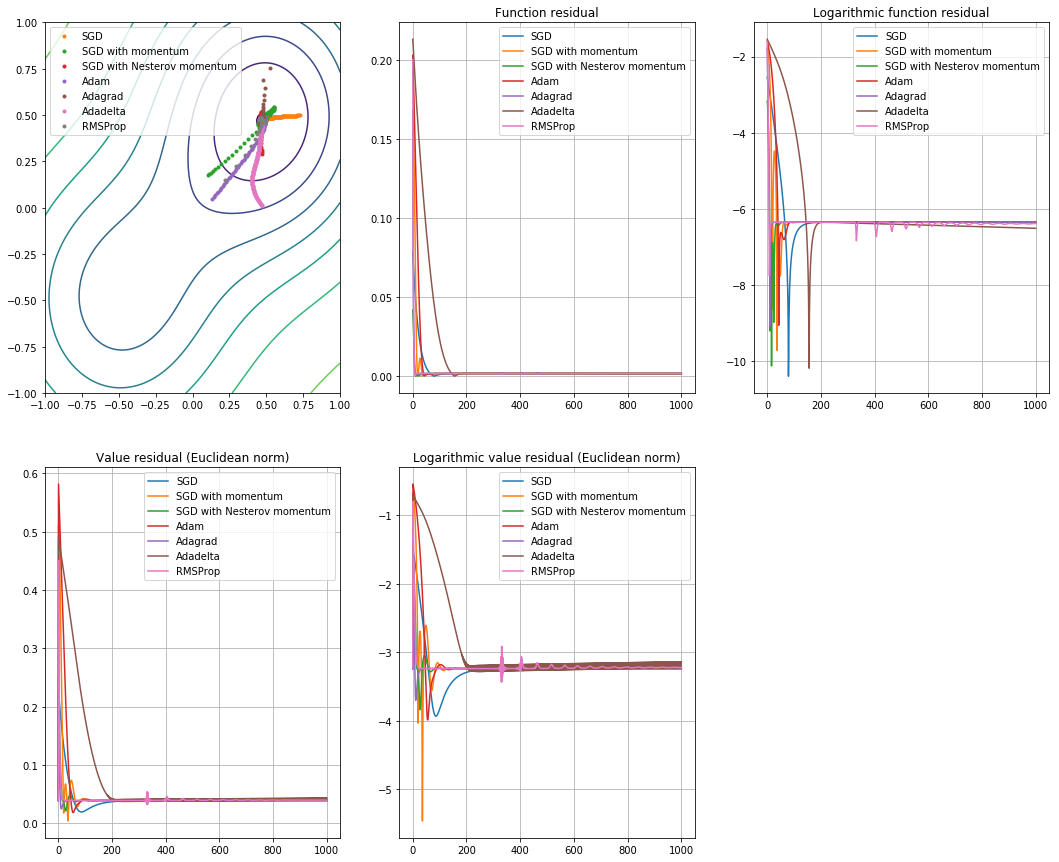

In [7]:
visualize_through_numpy(values, fun, "non-convex")